# K-armed bandit
This notebook implements k-armed bandit and four agents:
- Random agent
- $\epsilon$-greedy agent
- Optimistic agent
- Upper confidence bound agent

The purpose of the notebook is to get you a good understanding of:
- K-armed bandit problems
- Exploration vs exploitation tradeoff
- $\epsilon$-greedy action selection method
- Optimistic action selection method
- Upper confidence bound action selection method

## This is a graded assignment
To pass the assinment, you are expected to:
- perform all the code tasks, namely implement optimistic and ucb agents
- understand the topics behind this code, that were covered in a lecture
- present your code to the teacher and answer the questions

### Related reading from the Reinforcement Learning book
- Chapter 2-2.7 (Pages 25-36)


<a target="_blank" href="https://colab.research.google.com/github/PrzemekSekula/ReinfocementLearningClasses/blob/master/kArmedBandit/K_bandit-empty.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

### Bandit class
This class implements a k-armed bandit

In [2]:
class Bandit:
    def __init__(self, q_star, stddev=2):
      self.q_star = q_star
      self.stddev = stddev
    
    def execute(self, arm):
      return self.q_star[arm] + np.random.normal(scale=self.stddev)
    

Create a bandit object

In [3]:
bandit = Bandit([4, 5, 3, 3, 1, 2, 0, 1, 5, 1])
bandit.execute(3)

6.968053041787328

### Random agent
Agent that acts randomly

Parameters:
- `q_est` - estimated $q_{\star}$ values for each arm
- `n` - how many times each arm was selected

Methods:
- `act(self, bandit)` - performs an action (selects an arm randomly) and updates coresponding $Q$ and $n$ values. $Q$ is updated according to the formula:

$Q_{n+1} = Q{n} + \frac{1}{n}(R_n-Q_n)$

where:
- $Q_{n}$ - current estimated $q_{\star}$ value
- $Q_{n+1}$ - new estimated $q_{\star}$ value
- $R_n$ - reward obtained for an action $n$
- $n$ - number of actions (computed separately for each action type)

In [4]:
class RandomAgent:
    def __init__(self, bandit):
      self.q_est = [0]*len(bandit.q_star)
      self.n = [0]*len(bandit.q_star)
    
    def act(self, bandit):
      arm = np.random.randint(len(self.q_est))
      reward = bandit.execute(arm)
      self.n[arm] += 1
      self.q_est[arm] += (reward - self.q_est[arm])/self.n[arm]
      return reward


Let's run the agent and see how it works

In [5]:

agent = RandomAgent(bandit)
rewards = []
for step in range(1000):
  reward = agent.act(bandit)
  rewards.append(reward)

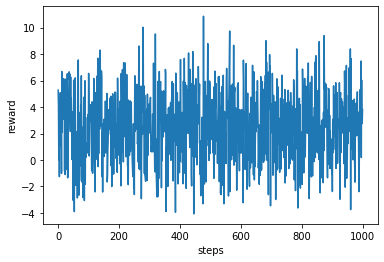

In [6]:
def plot_rewards (rewards):
    """
    Plots the rewards
    """
    f = plt.figure()
    plt.plot(rewards)
    plt.xlabel('steps')
    plt.ylabel('reward')
    plt.show()
    
plot_rewards(rewards)

In [7]:

def display_agent(agent, bandit):
    """
    Displays the agent data, namely:
    q_star - real expected rewards from the bandit
    q_est  - expected rewards extimated by the agent
    n      - how many times the agent selected this particular arm
    """
    df = pd.DataFrame()
    df['q_star'] = bandit.q_star
    df['q_est'] = agent.q_est
    df['n'] = agent.n
    return df

display_agent(agent, bandit)

,q_star,q_est,n
0,4,3.973602,111
1,5,5.267921,91
2,3,3.106563,113
3,3,2.969554,100
4,1,0.961122,81
5,2,1.896822,94
6,0,0.142937,111
7,1,0.824986,98
8,5,5.034130,92
9,1,0.832450,109


## $\epsilon$-greedy Agent

In [8]:
class EpsilonGreedyAgent:
    def __init__(self, bandit, epsilon = 0.1):
      self.q_est = [0]*len(bandit.q_star)
      self.n = [0]*len(bandit.q_star)
      self.epsilon = epsilon
    
    def act(self, bandit):
      if np.random.random() > self.epsilon:
        arm = np.argmax(self.q_est) #wybierz to ramie ktore uwazasz za najwieksze
      else: 
        arm = np.random.randint(len(self.q_est))
      
      reward = bandit.execute(arm)
      self.n[arm] +=1
      self.q_est[arm] += (reward - self.q_est[arm])/self.n[arm]

      return reward


Let's train the agent n times (1000 steps each time) to see how it works

In [9]:
total_rewards = []
for loop in tqdm(range(2000)):
  agent = EpsilonGreedyAgent(bandit) 
  rewards = []
  for step in range(1000):
    reward = agent.act(bandit)
    rewards.append(reward)
  total_rewards.append(rewards)
total_rewards = np.asarray(total_rewards)
rewards = total_rewards.mean(axis=0)
print(rewards.shape)

100%|██████████| 2000/2000 [00:32<00:00, 60.80it/s]


(1000,)


Let's display how the $\epsilon$-greedy agent works.

*Note: We trained many agents, and the displayed reward is the average of the rewards obrained by all the agents. However, the dataframe contains only the data for the latest agent*

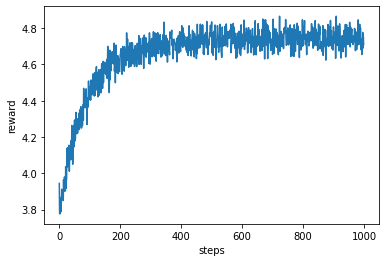

,q_star,q_est,n
0,4,4.178882,440
1,5,5.208765,480
2,3,2.549941,8
3,3,3.231540,9
4,1,0.529099,10
5,2,1.212091,13
6,0,-0.158259,9
7,1,1.938307,8
8,5,4.230715,11
9,1,-0.103420,12


In [10]:
plot_rewards(rewards)
display_agent(agent, bandit)

We may save the rewards for future comparisons

In [11]:
df_rewards = pd.DataFrame()
df_rewards['eGreedy'] = rewards

## Task 1  - Optimistic agent
Please fill in the placeholders to implement the optimistic agent.
Generally, you are suppose to prepate the `__init__` and `act` methods.
- In the `__init__` method you should set the initial values optimistically.
- In the `act` method you should:
    - Perform an action (select the arm greedily based on the estimated $q_{\star}$ values) 
    - Update the corresponding estimated $q_{\star}$ value

In [12]:
class OptimisticAgent:
    def __init__(self, bandit, initial_value=10):
      self.q_est = [initial_value]*len(bandit.q_star)
      self.n = [0]*len(bandit.q_star)
    
    def act(self, bandit):
      arm = np.argmax(self.q_est) 
      reward = bandit.execute(arm)
      self.n[arm] +=1
      self.q_est[arm] += (reward - self.q_est[arm])/self.n[arm]

      return reward

Agent traning

In [13]:
total_rewards = []
for loop in tqdm(range(2000)):
  agent = OptimisticAgent(bandit) 
  rewards = []
  for step in range(1000):
    reward = agent.act(bandit)
    rewards.append(reward)
  total_rewards.append(rewards)
total_rewards = np.asarray(total_rewards)
rewards = total_rewards.mean(axis=0)
print(rewards.shape)

100%|██████████| 2000/2000 [00:29<00:00, 67.20it/s]


(1000,)


Optimistic agent results visualization

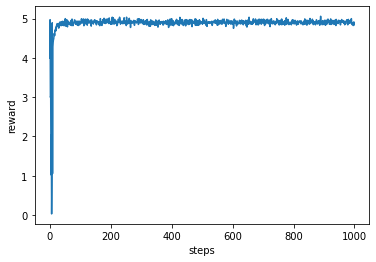

,q_star,q_est,n
0,4,2.539869,1
1,5,5.069411,989
2,3,4.681787,2
3,3,0.429570,1
4,1,-1.525458,1
5,2,1.877823,1
6,0,2.311638,1
7,1,-1.673559,1
8,5,4.585047,1
9,1,3.663578,2


In [14]:
df_rewards['optimistic'] = rewards # Let's store the results for comparison
plot_rewards(rewards)
display_agent(agent, bandit)

## Task 2  - Upper Confidence Bound agent

Please fill in the placeholders to implement the UCB agent.
Generally, you are suppose to prepate the `act` method. In this method you are supposed to:
- Compute the optimistic estimated $q_{\star}$ values for each action, according to the formula:
$Q_{optimistic}(a) = Q_{estimated}(a) + c \sqrt{\frac{ln(t)}{N_t(a)}}$ where:
    - $a$ - selected action
    - $Q_{estimated}(a)$ - estimated $q_{\star}$ value for action $a$
    - $c$ - explorarion parameter
    - $t$ - number of all steps taken so far
    - $N_t(a)$ - number of times when action $a$ was selected
- Perform an action (select the arm greedily based on the estimated $Q_{optimistic}$ values) 
- Update the corresponding estimated $q_{\star}$ value

In [15]:
class UCBAgent:
    def __init__(self, bandit, c = 3):
        self.q_est =  [0] * len(bandit.q_star)
        self.n =  [0] * len(bandit.q_star)
        self.c = c
        self.t=0

    def act(self, bandit): 
      self.t+=1 
      arm = np.argmax(self.q_est + self.c * np.sqrt(np.log(self.t) / self.n + 1e-6))
      reward = bandit.execute(arm)
      self.n[arm] += 1

      self.q_est[arm] += (reward - self.q_est[arm]) / (self.n[arm])

      return reward

Agent traning

In [16]:
total_rewards = []
for loop in tqdm(range(2000)):
  agent = UCBAgent(bandit) 
  rewards = []
  for step in range(1000):
    reward = agent.act(bandit)
    rewards.append(reward)
  total_rewards.append(rewards)
total_rewards = np.asarray(total_rewards)
rewards = total_rewards.mean(axis=0)
print(rewards.shape)

  0%|          | 0/2000 [00:00<?, ?it/s]<ipython-input-15-840d0bebee6b>:10: RuntimeWarning: invalid value encountered in true_divide
  arm = np.argmax(self.q_est + self.c * np.sqrt(np.log(self.t) / self.n + 1e-6))
<ipython-input-15-840d0bebee6b>:10: RuntimeWarning: divide by zero encountered in true_divide
  arm = np.argmax(self.q_est + self.c * np.sqrt(np.log(self.t) / self.n + 1e-6))
100%|██████████| 2000/2000 [01:01<00:00, 32.79it/s]


(1000,)


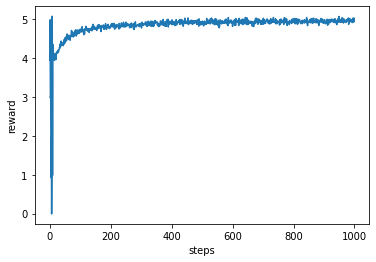

,q_star,q_est,n
0,4,4.215425,63
1,5,4.809333,252
2,3,2.568520,10
3,3,3.175723,15
4,1,2.025971,7
5,2,2.514352,10
6,0,-0.528585,2
7,1,1.782176,6
8,5,4.951979,631
9,1,1.086422,4


In [17]:
df_rewards['UCB'] = rewards # Let's store the results for comparison
plot_rewards(rewards)
display_agent(agent, bandit)

## Task 3 - understanding the code

See the results of all agents as well as the comparison below. Try to understand the results. To get the better understanding you may experiment with the code. For example, you may:
- Modify the k-armed bandit by changeing the real $Q_{\star}$ values and/or the standard deviation.
- Change the $\epsilon$ parameter in $\epsilon$-greedy agent and see how it impacts the behaviour of the agent
- Change the initial values for the optimistic agent and see how it impacts the behaviour of the agent
- Change exploration parameter $c$ for the UCB agent and see how it impacts the behaviour of the agent

<Axes: >

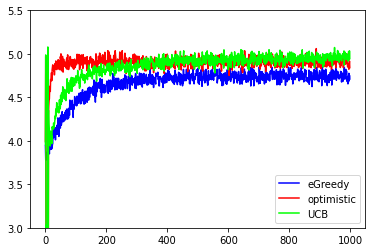

In [18]:
df_rewards.plot(colormap = 'brg', ylim=[3, 5.5])